In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

df = pd.read_csv('results.csv')
df.describe()

,nodes,ttl,seed,buffer_size,sim_time,created,started,relayed,aborted,dropped,...,latency_avg,latency_med,hopcount_avg,hopcount_med,buffertime_avg,buffertime_med,distance_avg,d_dist_avg,speed_avg,task_id
count,29865.000000,29865.0,29865.000000,29865.000000,29865.0,29865.000000,29865.000000,29865.000000,29865.000000,29865.000000,...,29865.000000,29865.000000,29865.000000,29865.000000,29865.000000,29865.000000,29865.000000,29865.000000,23965.000000,29865.000000
mean,516.390424,300.0,46808.889034,115.067805,21600.0,721.479826,188726.196652,187200.295664,1481.647715,49074.928646,...,3217.764849,2855.279993,3.526069,3.349037,7306.667355,7213.407400,7488.499281,7399.150021,3.940022,299.820358
std,318.938922,0.0,31415.650339,53.964663,0.0,461.102343,225972.948623,223683.811854,2464.795337,99985.598858,...,1389.386194,1211.773613,1.002562,1.073473,3069.481901,3237.230657,187.305458,217.767245,1.289930,173.530955
min,100.000000,300.0,22.000000,50.000000,21600.0,238.000000,1678.000000,1676.000000,0.000000,0.000000,...,1120.035700,1014.000000,1.907900,2.000000,972.169300,830.000000,6635.446675,6255.433923,1.839193,0.000000
25%,200.000000,300.0,15475.000000,75.000000,21600.0,242.000000,11239.000000,11199.000000,48.000000,221.000000,...,1853.338200,1743.000000,2.500000,2.000000,6163.901600,6250.000000,7371.131841,7262.799118,2.903520,149.000000
50%,400.000000,300.0,52770.000000,100.000000,21600.0,460.000000,106576.000000,106321.000000,303.000000,6471.000000,...,3365.749500,2891.000000,3.415700,3.000000,8460.117600,8250.000000,7482.093618,7399.238146,3.628447,301.000000
75%,800.000000,300.0,73906.000000,150.000000,21600.0,733.000000,288587.000000,287468.000000,1877.000000,45590.000000,...,4176.876100,3580.000000,4.362400,4.000000,9643.001800,9185.000000,7609.495149,7535.375472,4.894652,450.000000
max,1000.000000,300.0,98820.000000,200.000000,21600.0,1472.000000,958228.000000,946658.000000,11646.000000,732108.000000,...,6807.218500,6647.000000,5.819400,6.000000,10673.352800,12415.000000,8200.030324,8313.646498,7.491332,599.000000


In [3]:
#Filter results for a specific value e.g.

#Fix the buffer size to 50MB
df = df[df.buffer_size == 50] 
#Discard results for 800 and 1000
df = df[df.nodes <= 600]

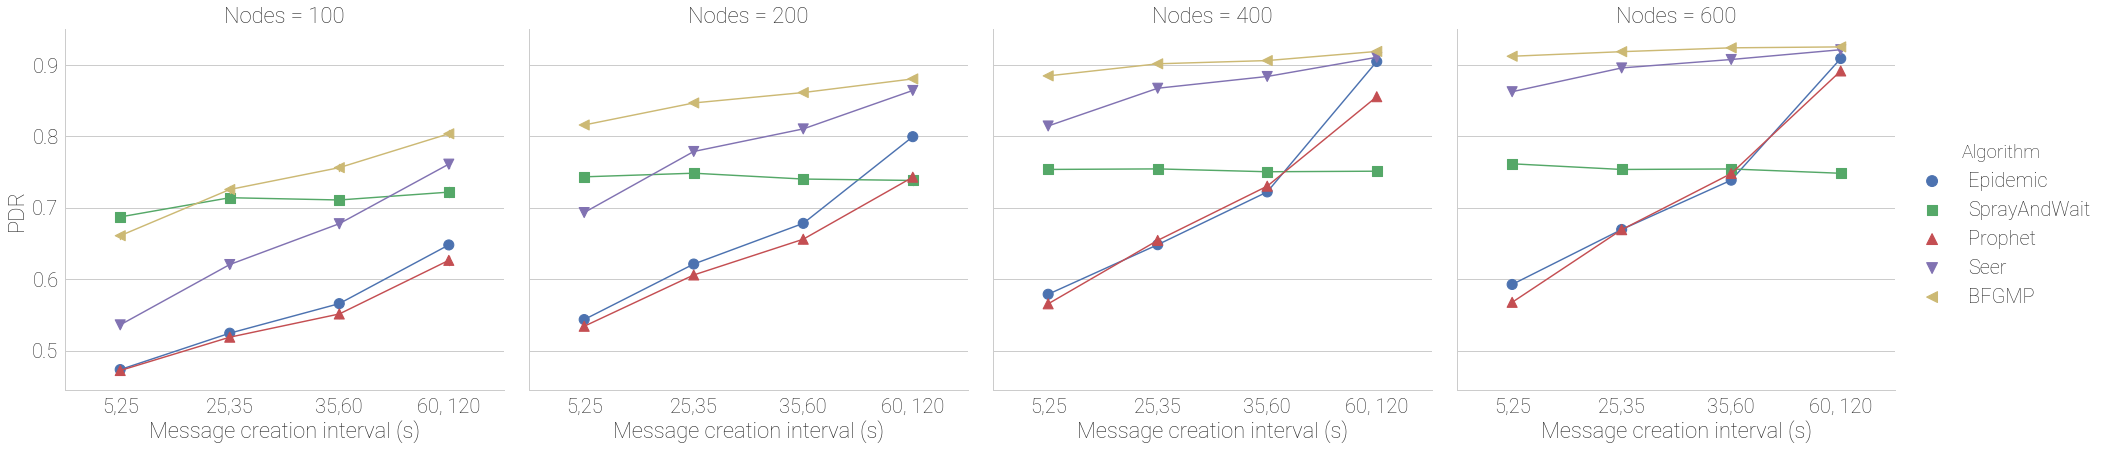

In [89]:
# Plot the delivery probability ratio
markers = ['o','s', '^', 'v', '<', '>']
x_axis_order = ['5,25', '25,35', '35,60', '60, 120']

sns.set(style='whitegrid', font='Roboto', font_scale=2, rc={"lines.linewidth": 0.8, "legend.markerscale":3})
#Saves the Packet delivery ratio plot to svg/pdf
with PdfPages('VANET_pdr.pdf') as pdf:
    g = sns.factorplot(x='message_interval', y='delivery_prob', hue='router', data=df, col='nodes', order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Message creation interval (s)', 'PDR')
    g._legend.set_title('Algorithm')
    g.set_titles('Nodes = {col_name}')
    for i in range(4):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_pdr.svg')
    pdf.savefig()

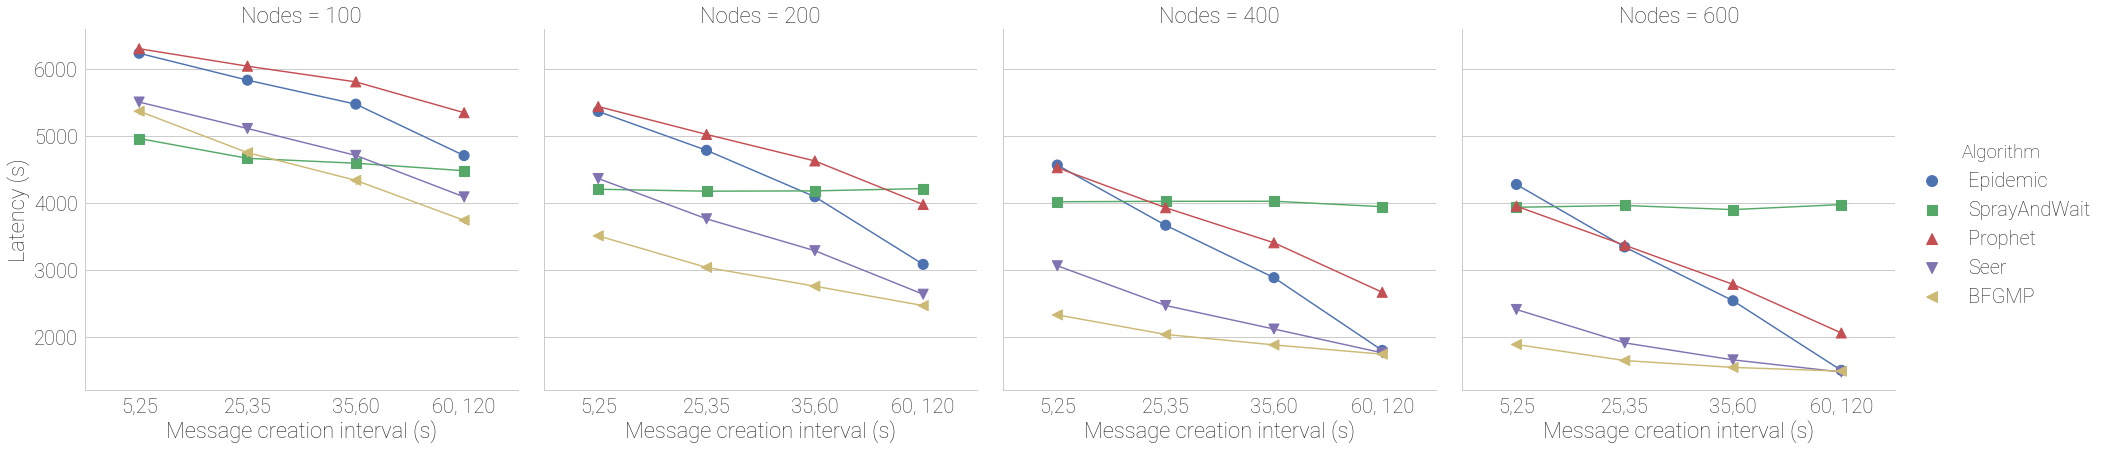

In [90]:
#Same as the above cell, for Latency
with PdfPages('VANET_latency.pdf') as pdf:
    g = sns.factorplot(x='message_interval', y='latency_avg', hue='router', data=df, col='nodes', order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Message creation interval (s)', 'Latency (s)')
    g._legend.set_title('Algorithm')
    g.set_titles('Nodes = {col_name}')
    for i in range(4):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_latency.svg')
    pdf.savefig()

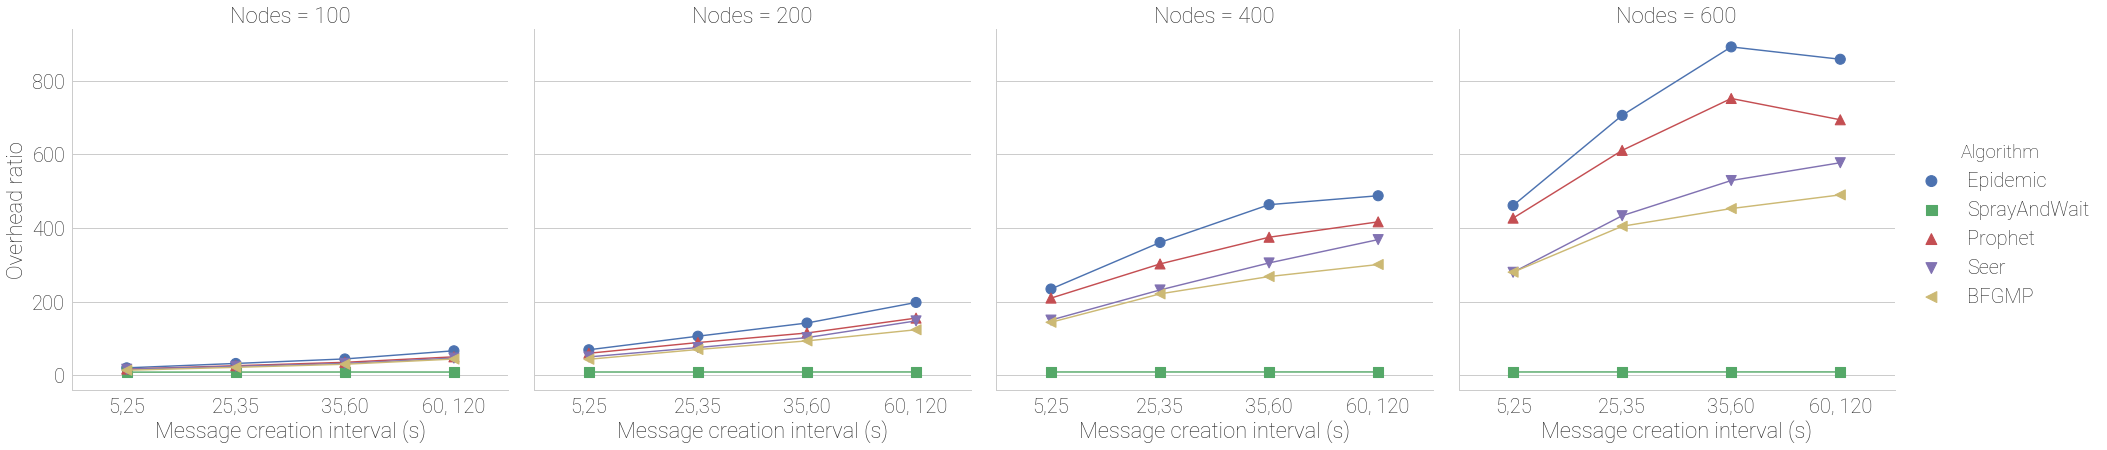

In [91]:
#Same as the above cell, for Latency
with PdfPages('VANET_overhead.pdf') as pdf:
    g = sns.factorplot(x='message_interval', y='overhead_ratio', hue='router', data=df, col='nodes', order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Message creation interval (s)', 'Overhead ratio')
    g._legend.set_title('Algorithm')
    g.set_titles('Nodes = {col_name}')
    for i in range(4):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_overhead.svg')
    pdf.savefig()

In [1]:
# Find the incomplete values for certain columns and show the name of the simulation file
pd.set_option('display.max_colwidth', -1)
ids = df[df.speed_avg.isnull()]
# display(ids)
ids.task_id.unique()

NameError: name 'pd' is not defined

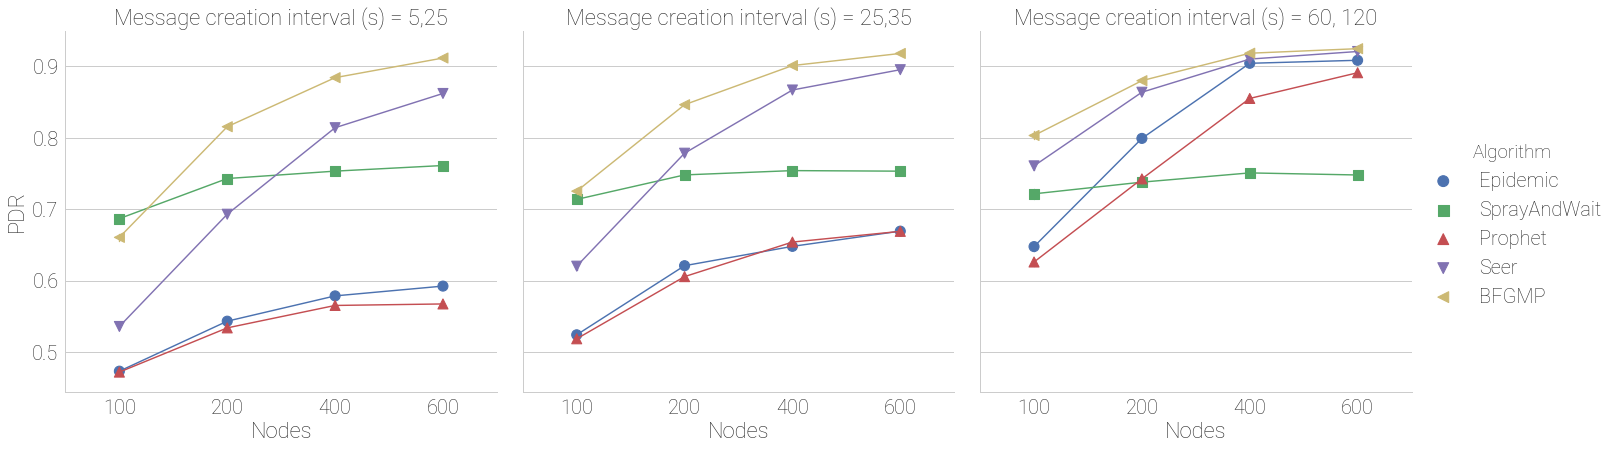

In [7]:
# Alternate plots
# Plot the delivery probability ratio
markers = ['o','s', '^', 'v', '<', '>']
x_axis_order = ['5,25', '25,35', '60, 120']

sns.set(style='whitegrid', font='Roboto', font_scale=2, rc={"lines.linewidth": 0.8, "legend.markerscale":3})
#Saves the Packet delivery ratio plot to svg/pdf
with PdfPages('VANET_alt_pdr.pdf') as pdf:
    g = sns.factorplot(x='nodes', y='delivery_prob', hue='router', data=df, col='message_interval', col_order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Nodes', 'PDR')
    g._legend.set_title('Algorithm')
    g.set_titles('Message creation interval (s) = {col_name}')
    for i in range(3):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_alt_pdr.svg')
    pdf.savefig()

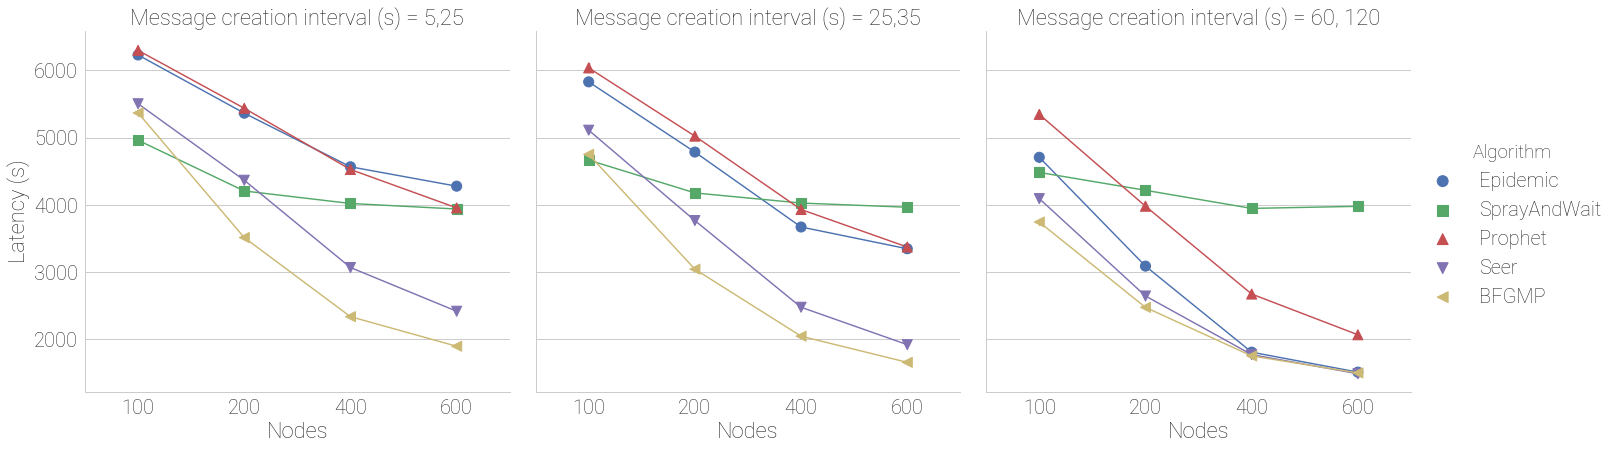

In [8]:
#Saves the Packet delivery ratio plot to svg/pdf
with PdfPages('VANET_alt_latency.pdf') as pdf:
    g = sns.factorplot(x='nodes', y='latency_avg', hue='router', data=df, col='message_interval', col_order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Nodes', 'Latency (s)')
    g._legend.set_title('Algorithm')
    g.set_titles('Message creation interval (s) = {col_name}')
    for i in range(3):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_alt_latency.svg')
    pdf.savefig()

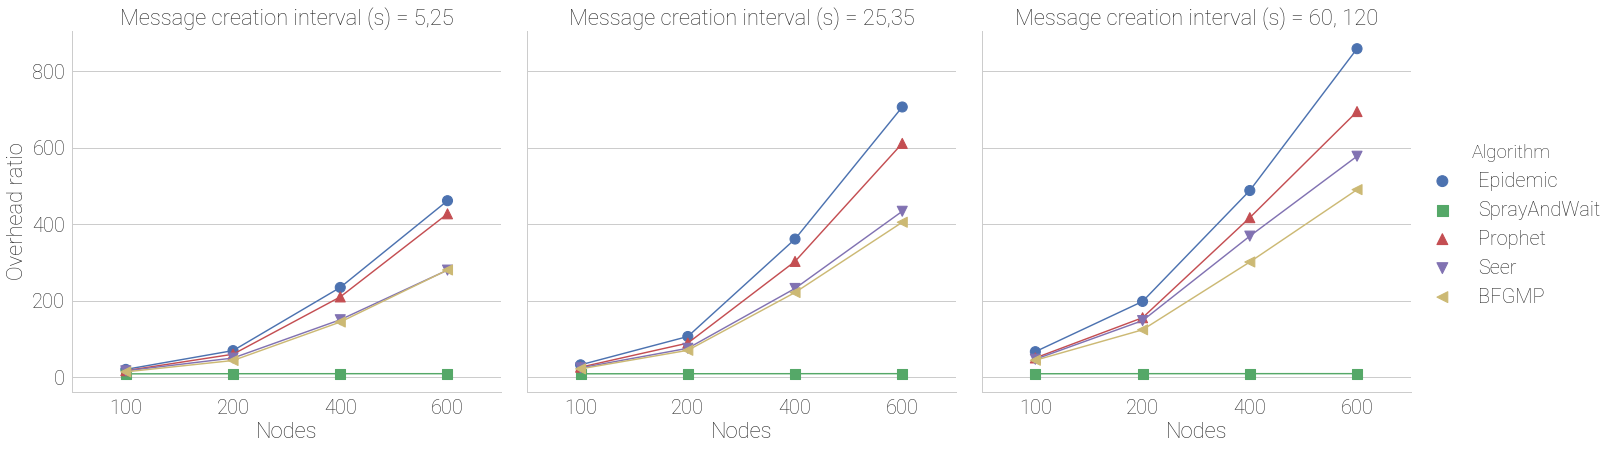

In [9]:
#Saves the Packet delivery ratio plot to svg/pdf
with PdfPages('VANET_alt_overhead.pdf') as pdf:
    g = sns.factorplot(x='nodes', y='overhead_ratio', hue='router', data=df, col='message_interval', col_order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Nodes', 'Overhead ratio')
    g._legend.set_title('Algorithm')
    g.set_titles('Message creation interval (s) = {col_name}')
    for i in range(3):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_alt_overhead.svg')
    pdf.savefig()